In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB 
from sklearn.multioutput import MultiOutputClassifier
import ast
from sklearn.metrics import brier_score_loss
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance

Stage 1

In [2]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage1.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['start', 'end', 'target_vector'])
    datasets.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance1 = []

for train_index, test_index in kf.split(datasets):
    
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    # X_train = X_train.fillna(0)
    # X_test = X_test.fillna(0)


    imputer = SimpleImputer(strategy='constant', fill_value=0)  # 可以选择'mean', 'median', 'most_frequent'等作为填充策略
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    model = MultiOutputClassifier(GaussianNB())
    model.fit(X_train, y_train)
    
    model_importance1.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))

    y_prob = model.predict_proba(X_test)

    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    brier_scores.append(brier_score)
    print(brier_score)

print(f'Stage 1 Average score across all folds: {np.mean(brier_scores)}')

0.04378954580649021
0.0407093609283876
0.04063317543590756
0.04027509352492708
0.04026169946587206
Stage 1 Average score across all folds: 0.0411337750323169


In [3]:
importance_df1 = pd.DataFrame()
importance_df1['features'] = pd.read_csv('../train/00001/train_stage1.csv').drop('target_vector', axis=1).columns

counter1 = 1
for i in range(len(model_importance1)):
    col_name = 'fit '+str(counter1)
    importance_df1[col_name] = model_importance1[i].importances_mean
    counter1 += 1

importance_df1['mean'] = importance_df1.drop('features', axis=1).mean(axis=1)
importance_df1 = importance_df1.sort_values(by='mean')
importance_df1['mean'] = importance_df1['mean'] / importance_df1['mean'].sum()
importance_df1


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
4,y_mean,0.004385,-0.006238,-0.001948,-0.000856,-0.001545,-0.009140
3,x_mean,0.018292,0.004742,0.018285,0.010578,0.029060,0.119320
5,z_mean,0.026659,0.007543,0.024034,0.018863,0.022156,0.146290
0,start,0.031275,0.025748,0.035752,0.035310,0.030178,0.233262
1,end,0.031275,0.025748,0.035752,0.035310,0.030178,0.233262
2,location_idx,0.027294,0.027371,0.047031,0.041639,0.044609,0.277006


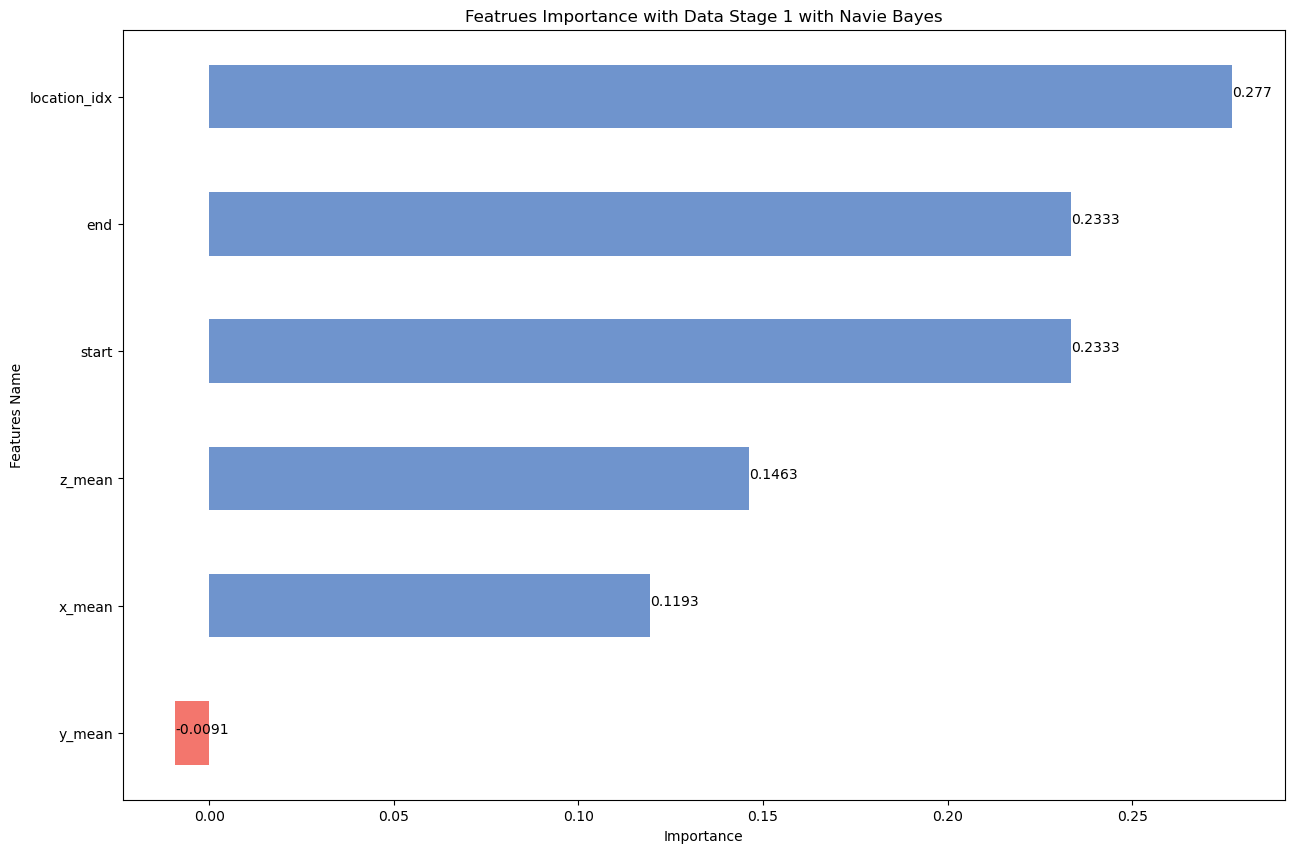

In [4]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df1['mean']]

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.barh(importance_df1['features'], importance_df1['mean'], color=colors, height=0.5)
ax1.set_ylabel('Features Name')
ax1.set_xlabel('Importance')
ax1.set_title('Featrues Importance with Data Stage 1 with Navie Bayes')

for index, value in enumerate(importance_df1['mean']):
    ax1.text(value, index, str(round(value, ndigits=4)))

plt.show()

Stage 2

In [5]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage2.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance2 = []

for train_index, test_index in kf.split(datasets):
    
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    # X_train = X_train.fillna(0)
    # X_test = X_test.fillna(0)


    imputer = SimpleImputer(strategy='constant', fill_value=0)  # 可以选择'mean', 'median', 'most_frequent'等作为填充策略
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    model = MultiOutputClassifier(GaussianNB())
    model.fit(X_train, y_train)
    
    model_importance2.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))

    y_prob = model.predict_proba(X_test)

    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    brier_scores.append(brier_score)
    print(brier_score)

print(f'Stage 2 Average score across all folds: {np.mean(brier_scores)}')

0.16981647494602842
0.17218027103464306
0.1554185145201921
0.1766202218772615
0.1450894085603755
Stage 2 Average score across all folds: 0.16382497818770014


In [15]:
importance_df2 = pd.DataFrame()
importance_df2['features'] = pd.read_csv('../train/00001/train_stage2.csv').drop('target_vector', axis=1).columns

counter2 = 1
for i in range(0,5):
    col_name = 'fit '+str(counter2)
    importance_df2[col_name] = model_importance2[i].importances_mean
    counter2 += 1

importance_df2['mean'] = importance_df2.drop('features', axis=1).mean(axis=1)
importance_df2 = importance_df2.sort_values(by='mean', ascending=False)
importance_df2['mean'] = importance_df2['mean'] / importance_df2['mean'].sum()
importance_df2


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
11,3d_movement_mean_x,0.017686,0.000191,0.001257,0.014736,0.010881,-0.098502
4,Lounge_AP,0.004068,0.002737,0.001571,0.002140,0.004931,-0.034001
3,Kitchen_AP,0.000202,0.003851,0.006472,0.004249,-0.003485,-0.024851
6,Study_AP,0.001212,0.000000,-0.000189,0.004311,0.005227,-0.023246
22,3d_shape_mean_height,0.001010,-0.000159,-0.001225,0.005228,0.004536,-0.020668
18,2d_shape_mean_height,-0.001500,-0.000573,-0.000377,0.003210,0.003879,-0.010211
52,yz_corr,-0.000231,0.000159,0.000314,0.000856,0.001512,-0.005746
12,3d_movement_mean_y,-0.002712,0.003310,-0.000346,0.002751,-0.000986,-0.004441
51,xz_corr,0.000577,0.000095,-0.000126,0.000489,0.000362,-0.003076
38,y_median,0.000837,-0.000668,-0.001131,0.001590,0.000394,-0.002249


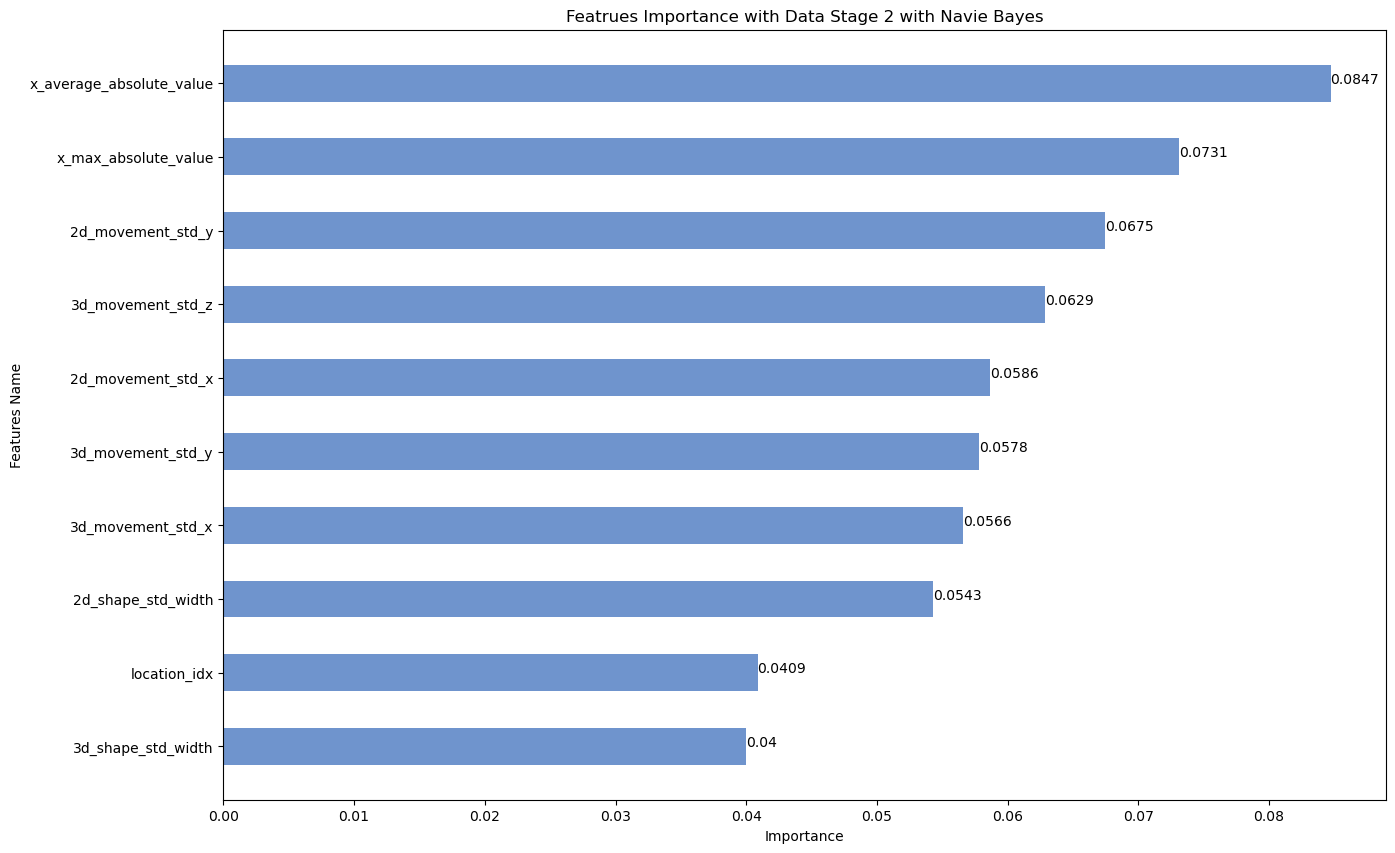

In [16]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df2['mean'].tail(10)]

fig, ax2 = plt.subplots(figsize=(15,10))

ax2.barh(importance_df2['features'].tail(10), importance_df2['mean'].tail(10), color=colors, height=0.5)
ax2.set_ylabel('Features Name')
ax2.set_xlabel('Importance')
ax2.set_title('Featrues Importance with Data Stage 2 with Navie Bayes')

for index, value in enumerate(importance_df2['mean'].tail(10)):
    ax2.text(value, index, str(round(value, 4)))

plt.show()

Stage 3


In [8]:
datasets = []
for i in range(1, 11):
    df = pd.read_csv(f'../train/{i:05d}/train_stage3.csv')
    df['target_vector'] = df['target_vector'].apply(ast.literal_eval) 
    
    # target_vector max to 1 other to 0
    def set_max_to_one(target_list):
        max_value = max(target_list)
        return [1 if value == max_value else 0 for value in target_list]
    
    target_df = pd.DataFrame(df['target_vector'].apply(set_max_to_one).tolist(), index=df.index)
    features_df = df.drop(columns=['target_vector'])
    datasets.append((features_df, target_df))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

brier_scores = []
model_importance3 = []

for train_index, test_index in kf.split(datasets):
    
    X_train = pd.concat([datasets[i][0] for i in train_index], ignore_index=True)
    y_train = pd.concat([datasets[i][1] for i in train_index], ignore_index=True)
    
    X_test = pd.concat([datasets[i][0] for i in test_index], ignore_index=True)
    y_test = pd.concat([datasets[i][1] for i in test_index], ignore_index=True)
    # X_train = X_train.fillna(0)
    # X_test = X_test.fillna(0)


    imputer = SimpleImputer(strategy='constant', fill_value=0)  # 可以选择'mean', 'median', 'most_frequent'等作为填充策略
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    model = MultiOutputClassifier(GaussianNB())
    model.fit(X_train, y_train)
    
    model_importance3.append(permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42))

    y_prob = model.predict_proba(X_test)

    brier_score = np.mean([brier_score_loss(y_test.iloc[:, c], y_prob[c][:, 1], pos_label=1) for c in range(y_test.shape[1])])
    brier_scores.append(brier_score)
    print(brier_score)

print(f'Stage 3 Average score across all folds: {np.mean(brier_scores)}')

0.1606940251505748
0.1597503747982629
0.14519176531582104
0.1774065712706898
0.1413408988130187
Stage 3 Average score across all folds: 0.15687672706967343


In [17]:
importance_df3 = pd.DataFrame()
importance_df3['features'] = pd.read_csv('../train/00001/train_stage3.csv').drop('target_vector', axis=1).columns

counter3 = 1
for i in range(len(model_importance3)):
    col_name = 'fit '+str(counter3)
    importance_df3[col_name] = model_importance3[i].importances_mean
    counter3 += 1

importance_df3['mean'] = importance_df3.drop('features', axis=1).mean(axis=1)
importance_df3 = importance_df3.sort_values(by='mean', ascending=False)
importance_df3['mean'] = importance_df3['mean'] / importance_df3['mean'].sum()
importance_df3


,features,fit 1,fit 2,fit 3,fit 4,fit 5,mean
6,Study_AP,0.000490,0.000000,3.770028e-04,0.000245,0.002334,-0.007075
51,yz_corr,0.000087,-0.000573,3.469447e-19,0.000153,0.002564,-0.004580
8,2d_movement_mean_y,0.001991,-0.001337,5.969211e-04,-0.001070,0.001545,-0.003544
50,xz_corr,-0.000289,-0.000127,5.340873e-04,0.000306,0.000822,-0.002558
49,xy_corr,-0.000289,-0.000223,1.005341e-03,-0.000031,0.000756,-0.002504
32,x_max_value,0.000231,-0.001050,-2.199183e-04,-0.000397,0.001348,0.000183
4,Lounge_AP,-0.001212,-0.000637,8.796733e-04,-0.000459,0.000131,0.002660
22,3d_shape_mean_height,0.001789,-0.001337,9.425071e-05,-0.000978,-0.001512,0.003991
39,y_max_value,-0.000231,-0.002355,-9.425071e-05,0.000397,0.000066,0.004552
33,x_min_value,-0.000981,-0.001050,-5.340873e-04,-0.000214,-0.000493,0.006718


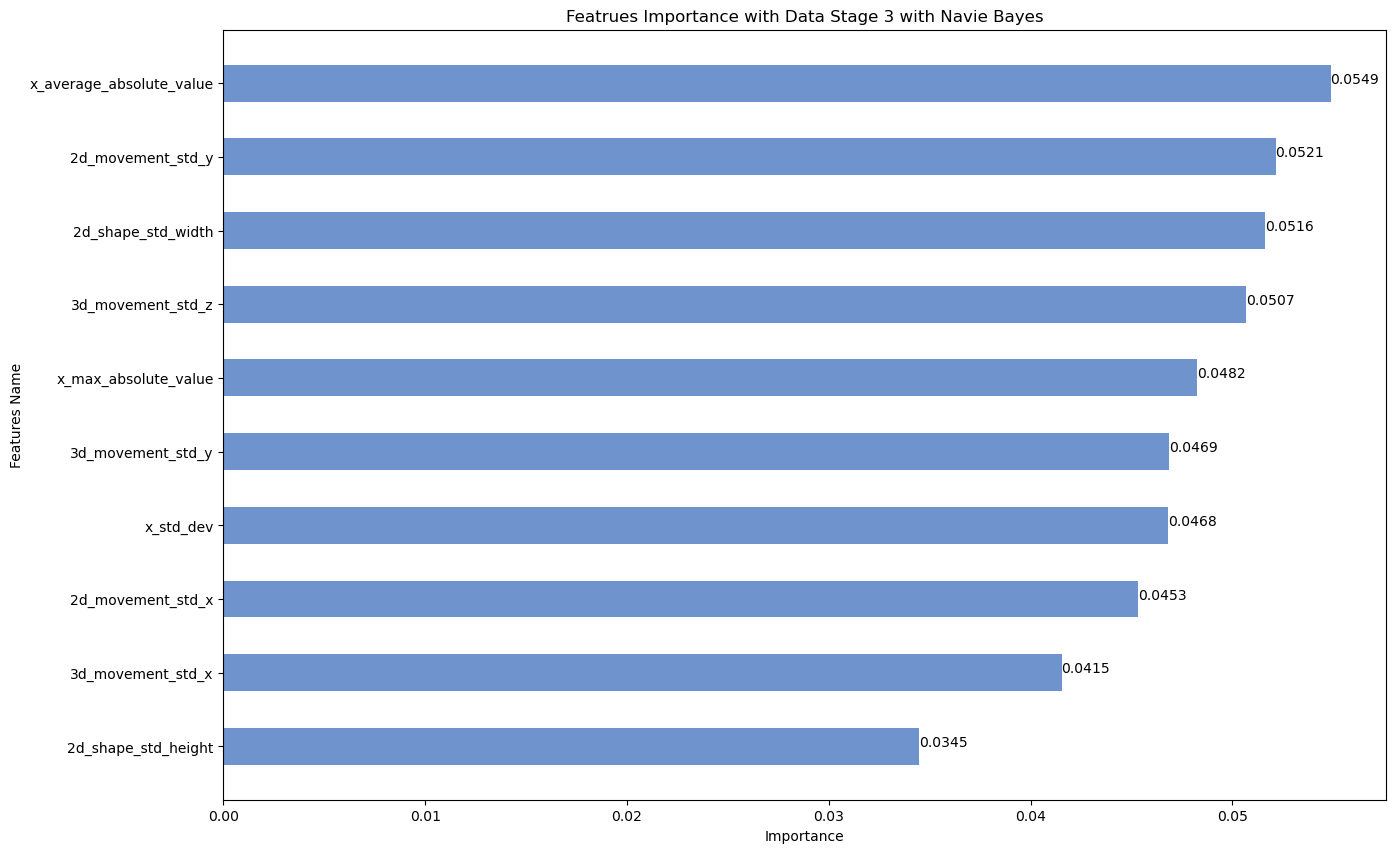

In [18]:
import matplotlib.pyplot as plt

colors = ['#f3766d' if v < 0 else '#6f94cd' for v in importance_df3['mean'].tail(10)]

fig, ax3 = plt.subplots(figsize=(15,10))

ax3.barh(importance_df3['features'].tail(10), importance_df3['mean'].tail(10), color=colors, height=0.5)
ax3.set_ylabel('Features Name')
ax3.set_xlabel('Importance')
ax3.set_title('Featrues Importance with Data Stage 3 with Navie Bayes')

for index, value in enumerate(importance_df3['mean'].tail(10)):
    ax3.text(value, index, str(round(value, ndigits=4)))

plt.show()